In [1]:
#Lets implement Linear regression model from Scratch

import numpy as np
import matplotlib.pyplot as plt
# Data: size of the house (x) in square meters, and price (y) in $1000
x = np.array([50, 60, 70, 80, 90, 100, 110, 120])  # Feature (house size)
y = np.array([10, 20, 40, 35, 60, 90, 80, 100])  # Target (price)

# Normalize x for better optimization
x = x / 100.0  # Scale features to smaller range



# Define the Hypothesis (Model)

The hypothesis (model) is defined as:

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot x
$$


In [2]:
def predict(x, theta):
    return theta[0] + theta[1] * x
  #Lets think it as a model


# Define the Cost Function

The cost function is defined as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x_i) - y_i \right)^2
$$


In [3]:
def compute_cost(x, y, theta):
    m = len(y)
    predictions = predict(x, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost


# 3. Implement Gradient Descent for Optimization

Update the parameters θ₀ and θ₁:

$$
\theta_j = \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$$


So these functions are needed to make a regression model from scratch

In [4]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []  # Track cost function over iterations

    for _ in range(iterations):
        predictions = predict(x, theta)
        errors = predictions - y

        # Partial derivatives
        gradient_0 = (1 / m) * np.sum(errors)
        gradient_1 = (1 / m) * np.sum(errors * x)

        # Update parameters
        theta[0] -= alpha * gradient_0
        theta[1] -= alpha * gradient_1

        # Save the cost for this iteration
        cost_history.append(compute_cost(x, y, theta))

    return theta, cost_history


In [5]:
# Initialize parameters
theta = [0, 0]  # [theta_0, theta_1]
alpha = 0.1  # Learning rate
iterations = 1000  # Number of iterations

# Perform gradient descent
theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
print(f"Optimized parameters: {theta}")

Optimized parameters: [-53.011044835112365, 126.49331201100499]


Plot

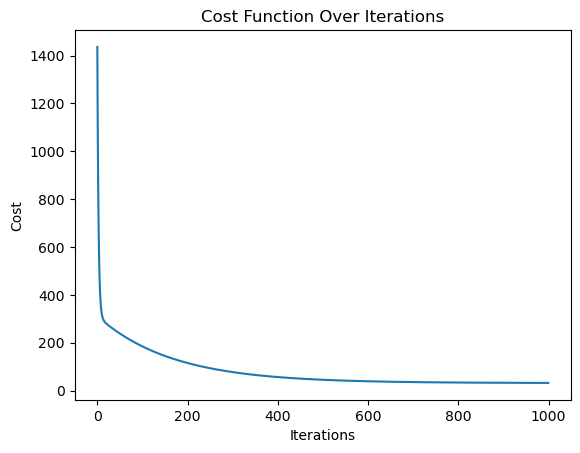

In [6]:
plt.plot(range(iterations), cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


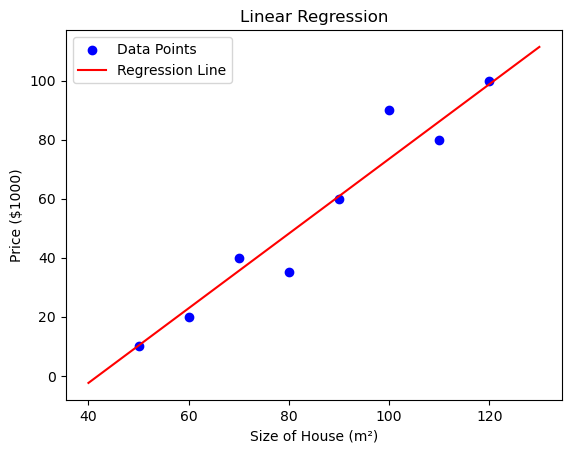

In [7]:
# Plot data points
plt.scatter(x * 100, y, color='blue', label='Data Points')  # x scaled back for visualization

# Plot regression line
x_line = np.linspace(40, 130, 100) / 100.0  # Generate more points for smoother line
y_line = predict(x_line, theta)
plt.plot(x_line * 100, y_line, color='red', label='Regression Line')  # x scaled back for visualization

plt.title("Linear Regression")
plt.xlabel("Size of House (m²)")
plt.ylabel("Price ($1000)")
plt.legend()
plt.show()
